In [130]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [131]:
df=pd.read_csv(r"/content/application_train.csv")

In [132]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


More amount of inquiries from particular client denotes more financial instability

In [133]:
df['SUM_FLAG_DOCUMENTS'] = df['FLAG_DOCUMENT_2'] + df['FLAG_DOCUMENT_3'] + df['FLAG_DOCUMENT_4'] + df['FLAG_DOCUMENT_5'] + df['FLAG_DOCUMENT_6'] + df['FLAG_DOCUMENT_7'] + df['FLAG_DOCUMENT_8'] + df['FLAG_DOCUMENT_9'] + df['FLAG_DOCUMENT_10'] + df['FLAG_DOCUMENT_11'] + df['FLAG_DOCUMENT_12'] + df['FLAG_DOCUMENT_13'] + df['FLAG_DOCUMENT_14'] + df['FLAG_DOCUMENT_15'] +df['FLAG_DOCUMENT_16'] + df['FLAG_DOCUMENT_17'] + df['FLAG_DOCUMENT_18'] + df['FLAG_DOCUMENT_19'] + df['FLAG_DOCUMENT_20'] + df['FLAG_DOCUMENT_21']

In [134]:
df['SUM_FLAG_DOCUMENTS'].value_counts()

1    270056
0     29549
2      7742
3       163
4         1
Name: SUM_FLAG_DOCUMENTS, dtype: int64

In [135]:
columns_to_drop = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df = df.drop(columns_to_drop, axis=1)

In [136]:
df = df.drop('SK_ID_CURR', axis=1)

In [137]:
columns_to_drop = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
df = df.drop(columns_to_drop, axis=1)

<Axes: >

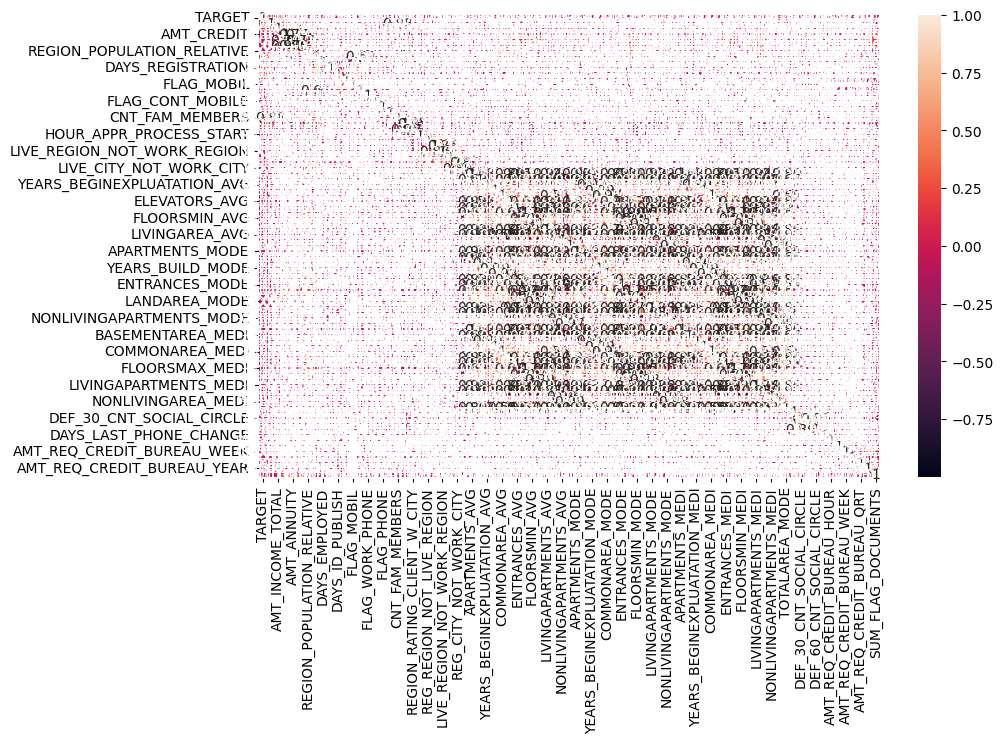

In [138]:
cor=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)

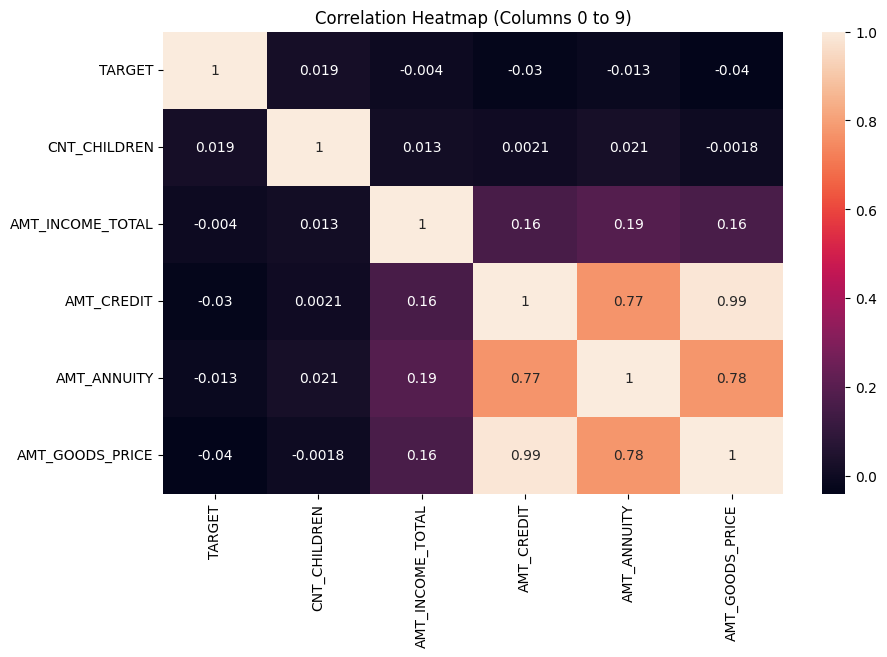

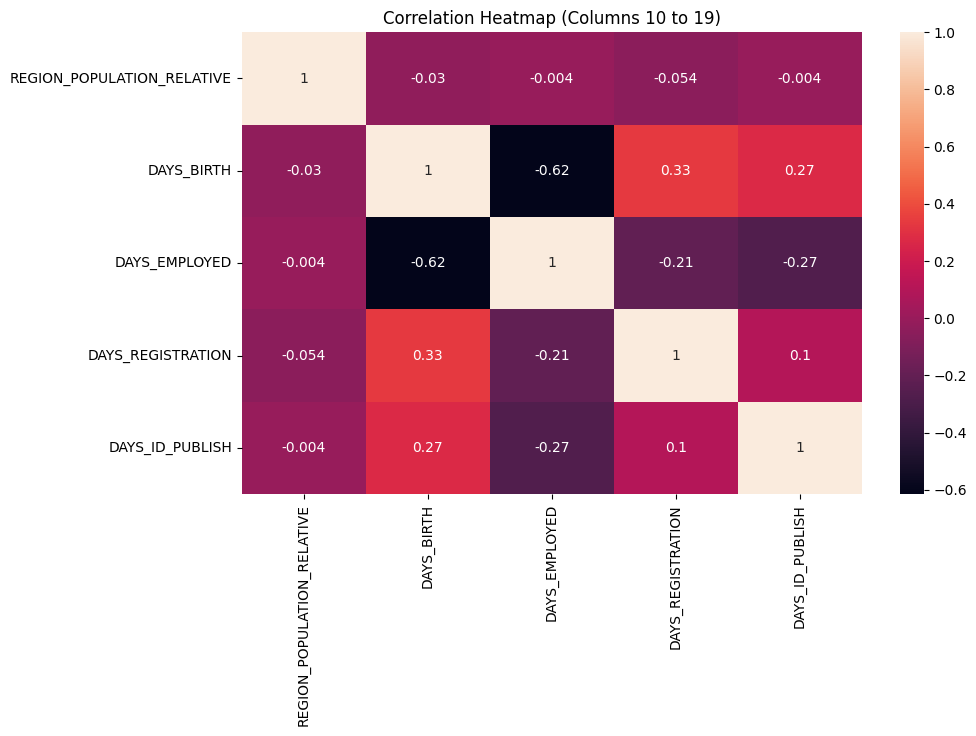

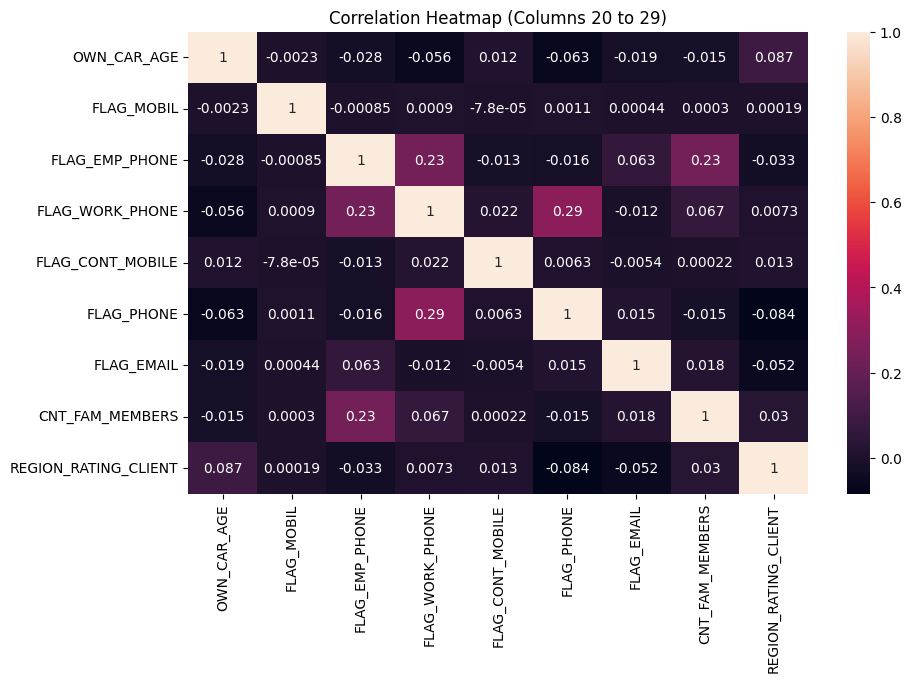

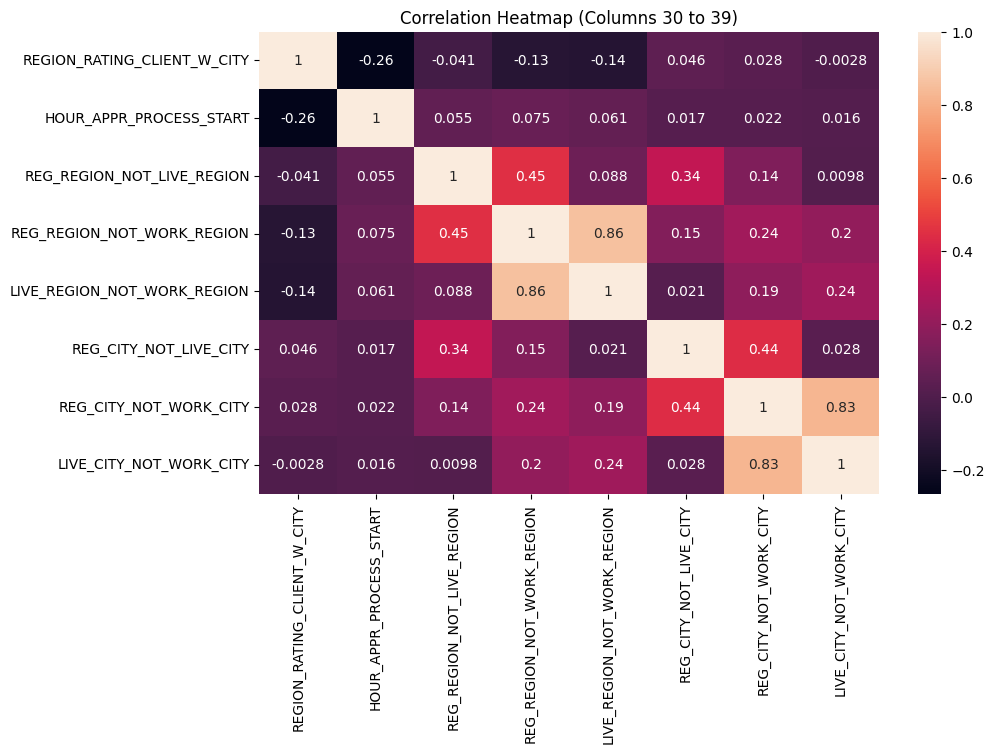

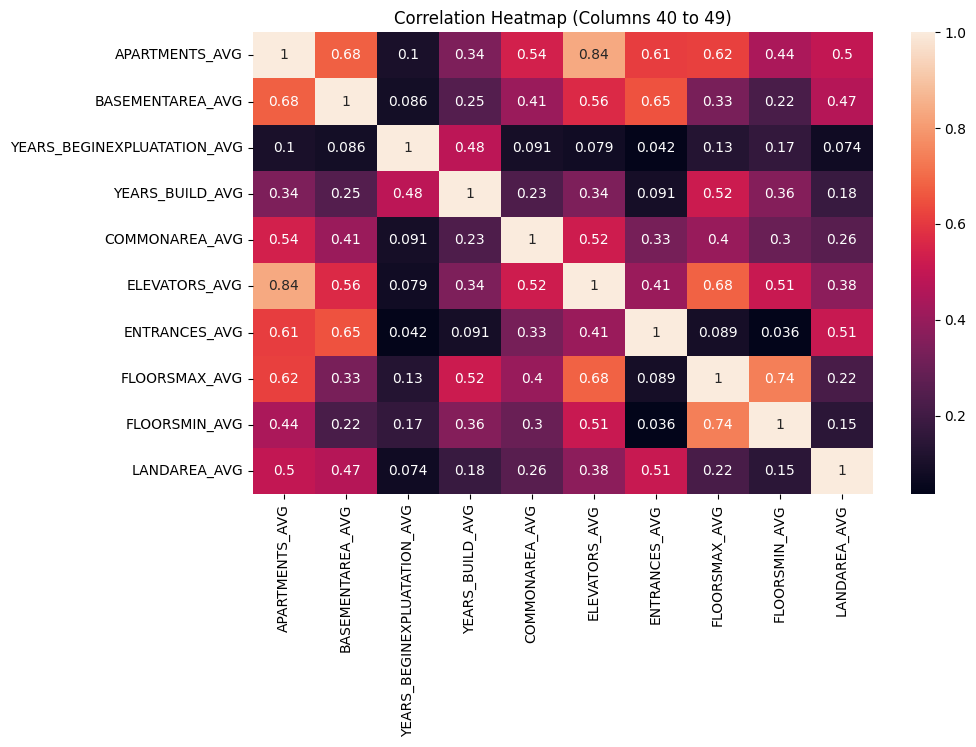

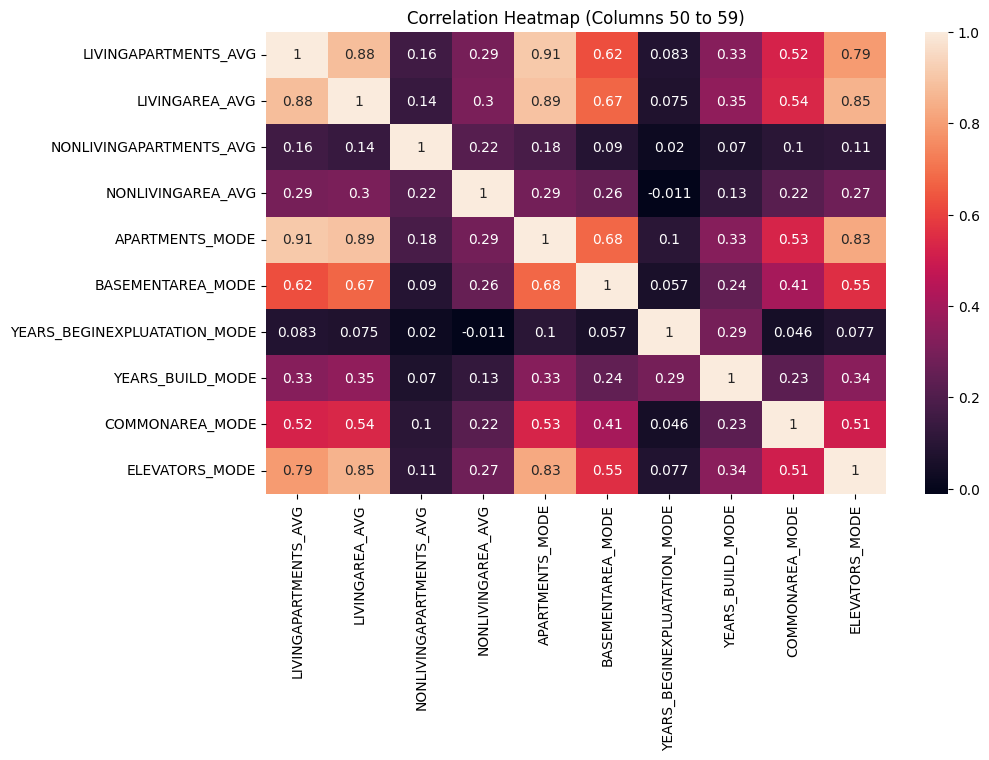

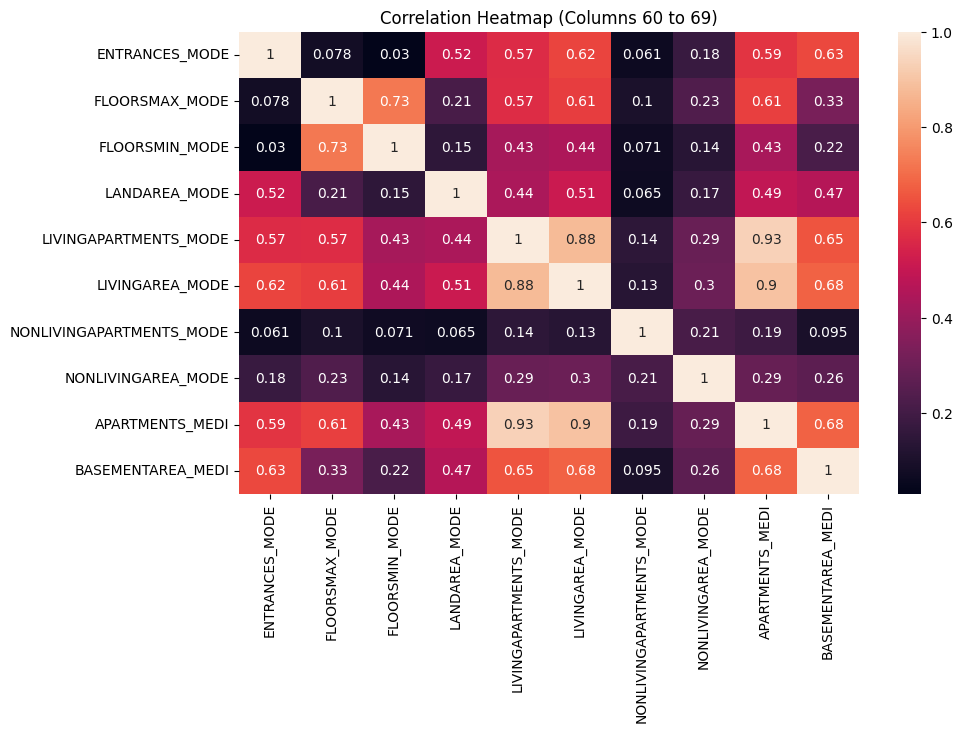

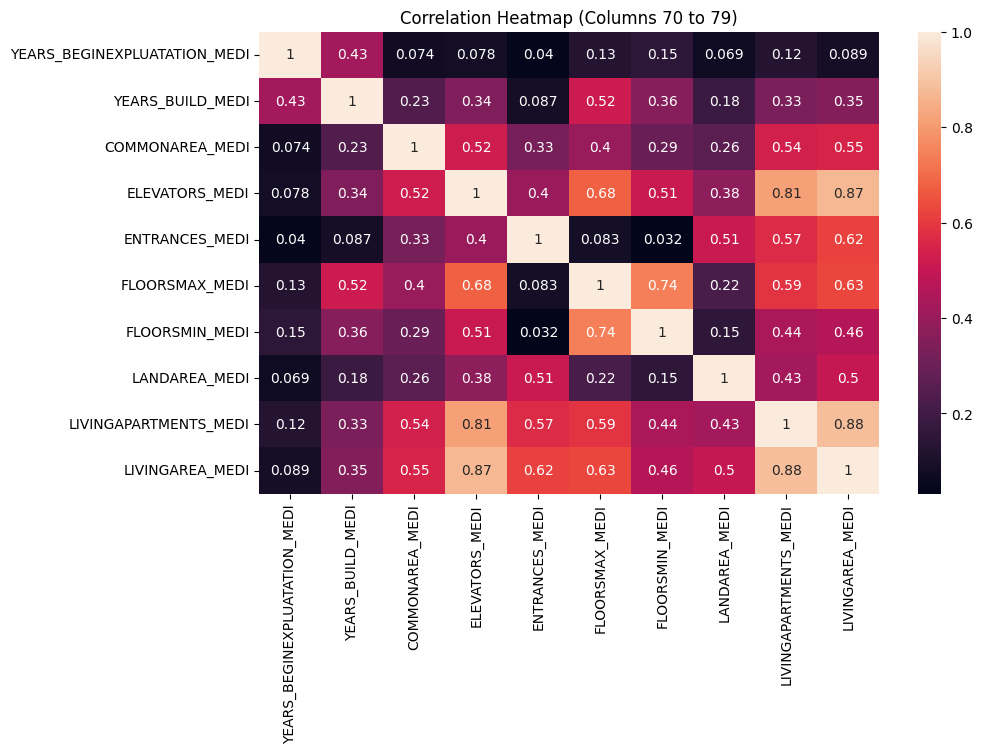

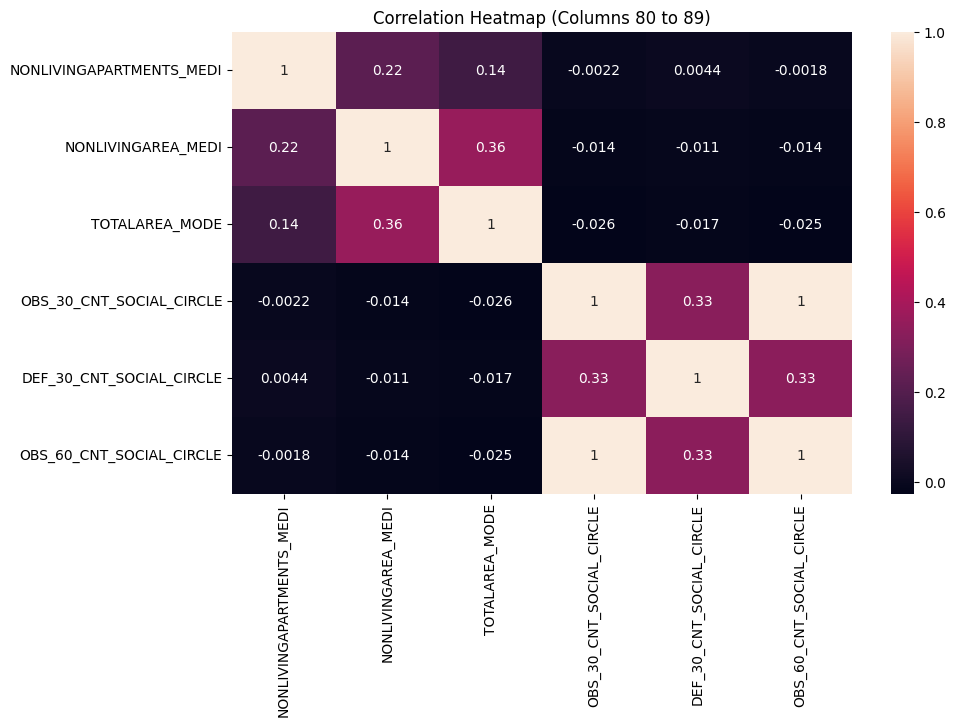

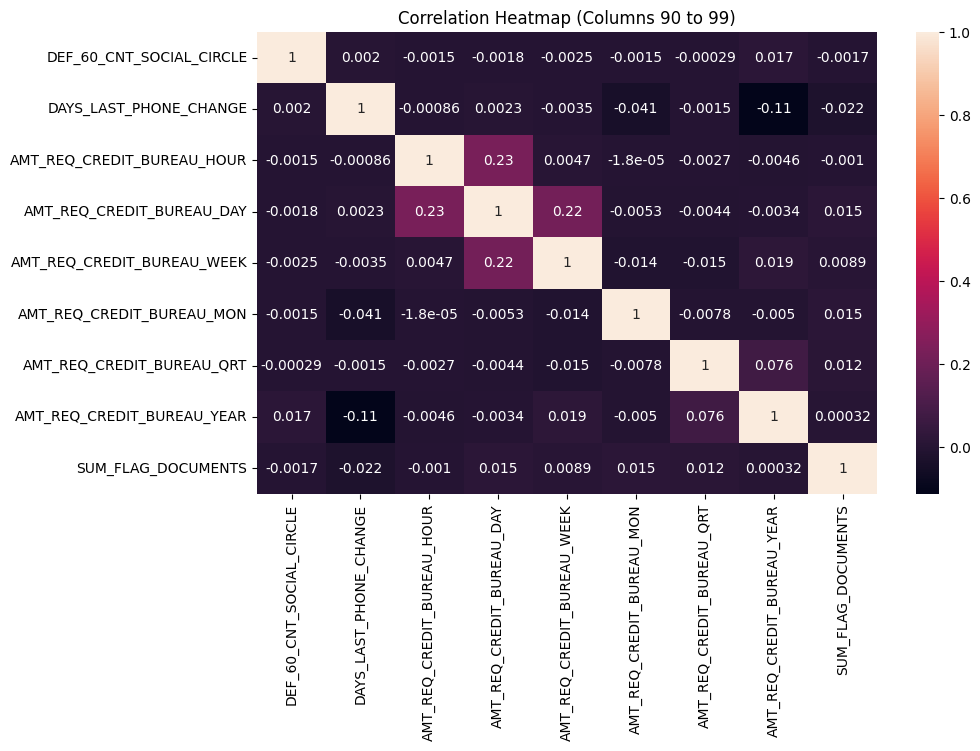

In [139]:
num_columns = len(df.columns)
step = 10

for i in range(0, num_columns, step):
    # Select 10 columns at a time
    columns_subset = df.iloc[:, i:i+step]

    cor = columns_subset.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(cor, annot=True)
    plt.title(f'Correlation Heatmap (Columns {i} to {i+step-1})')
    plt.show()

In [140]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

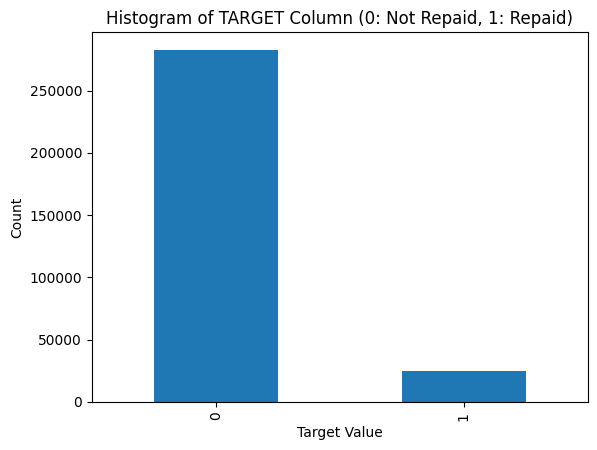

In [141]:
import matplotlib.pyplot as plt
df['TARGET'].value_counts().plot(kind='bar')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Histogram of TARGET Column (0: Not Repaid, 1: Repaid)')
plt.show()#so major number of clients are not repaid yet

In [142]:
#1)By analyzing most of the clients given contact number so I'm just deleting the particular rows and Im using DAYS_employed column s for algorithm building so im not using days of bith
#2)Im not uing car data because the resale value will be quite less,so not predicting by using car columns
# 3)I'm going to use of family member count so I'm droping children counts

In [143]:
columns_to_drop = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DAYS_BIRTH','OWN_CAR_AGE','CNT_CHILDREN','FLAG_OWN_CAR']
df = df.drop(columns_to_drop, axis=1)

In [144]:
a=0
b=0
c=0
for i in df['DAYS_EMPLOYED']:
  if i<-1:
    a+=1
  elif i==0:
    b+=1
  else:
    c+=1
print("negative",a)
print("zero",b)
print("positive",c)#there are many positive values seen than there are stable clients seen

negative 252134
zero 2
positive 55375


In [145]:
df['DAYS_EMPLOYED'] = [-1 if x < -1 else (0 if x == 0 else 1) for x in df['DAYS_EMPLOYED']]

In [146]:
df['DAYS_EMPLOYED'].value_counts()

-1    252134
 1     55375
 0         2
Name: DAYS_EMPLOYED, dtype: int64

So by using DAYS_Employed we can see how many days occurred after joining as employeed so because of that some columns we can drop like days of birth

In [147]:
df['OCCUPATION_TYPE'].value_counts()#so after analyzing part i can label some values

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [148]:
len(df.columns) #till yet from 122 column we have dropped till 90

89

In [149]:
a=0
b=0
c=0
for i in df['DAYS_REGISTRATION']:
  if i<-1:
    a+=1
  elif i==0:
    b+=1
  else:
    c+=1
print("negative",a)
print("zero",b)
print("positive",c)

negative 307318
zero 80
positive 113


In [150]:
df['DAYS_REGISTRATION'] = [-1 if x < -1 else (0 if x == 0 else 1) for x in df['DAYS_REGISTRATION']]

In [151]:
df['NAME_HOUSING_TYPE'].value_counts()# after analyzing we will encode it

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [152]:
a=0
b=0
c=0
for i in df['REGION_POPULATION_RELATIVE']:
  if i>1:
    a+=1
  elif 0.5<i<1:
    b+=1
  else:
    c+=1
print("urban",a)
print("suburban",b)
print("rural",c)

#High values (above 1): Indicates that the applicant lives in a densely populated region, possibly a major city or urban area.
#Mid-range values (around 0.5 - 1): Indicates that the applicant lives in a moderately populated area, possibly a smaller city or suburban area.
#Low values (below 0.5): Indicates that the applicant lives in a less densely populated area, possibly a rural area or small town.

urban 0
suburban 0
rural 307511


In [153]:
df['REGION_POPULATION_RELATIVE'] = ["Urban" if x > 1 else ("Suburban" if 0.5<x<1 else "Rural") for x in df['REGION_POPULATION_RELATIVE']]

In [154]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AV

In [155]:
#1)'NAME_EDUCATION_TYPE' as this column will be not necessary for credit cards ,its depend on job
#2)for further Analyzing and algo building i will be using NAME_FAMILY_STATUS,NAME_HOUSING_TYPE column so I'm not dropping

In [156]:
#Negative value is risk,0 is neutral and +ve value is good clients
a=0
b=0
c=0
for i in df['DAYS_ID_PUBLISH']:
  if i<-1:
    a+=1
  elif i==0:
    b+=1
  else:
    c+=1
print("risk",a)
print("neutral",b)
print("no risk",c)
df['DAYS_ID_PUBLISH'] = ["RISK" if x <- 1 else ("NEUTRAL" if x==0 else "no RISK") for x in df['DAYS_ID_PUBLISH']]

risk 307431
neutral 16
no risk 64


In [157]:
for index, row in df.iterrows():
    if row['AMT_CREDIT'] > row['AMT_GOODS_PRICE']:
        print("risk")
    else:
        print("no risk")

Streaming output truncated to the last 5000 lines.
risk
risk
risk
no risk
risk
no risk
risk
no risk
no risk
risk
risk
risk
risk
no risk
no risk
risk
risk
risk
risk
risk
risk
no risk
risk
risk
risk
no risk
risk
no risk
risk
no risk
risk
no risk
risk
risk
risk
risk
risk
risk
no risk
risk
risk
risk
risk
no risk
risk
no risk
no risk
risk
risk
risk
risk
risk
no risk
risk
risk
risk
no risk
no risk
risk
no risk
no risk
risk
no risk
no risk
no risk
risk
risk
risk
risk
risk
risk
risk
risk
risk
risk
no risk
no risk
risk
risk
risk
risk
risk
risk
no risk
no risk
risk
risk
risk
risk
risk
no risk
risk
risk
risk
risk
risk
risk
risk
risk
risk
risk
no risk
risk
no risk
no risk
risk
risk
risk
no risk
no risk
no risk
no risk
risk
risk
no risk
no risk
risk
no risk
risk
risk
risk
risk
risk
risk
risk
risk
risk
risk
no risk
risk
no risk
risk
no risk
risk
risk
no risk
risk
risk
risk
risk
risk
risk
no risk
no risk
no risk
risk
risk
no risk
no risk
no risk
no risk
risk
no risk
risk
no risk
no risk
risk
risk
no 

In [158]:
df['credit risk'] = df.apply(lambda row: 'Risk' if row['AMT_CREDIT'] > row['AMT_GOODS_PRICE'] else 'No Risk', axis=1)

In [159]:
df['credit risk'].value_counts()

Risk       198763
No Risk    108748
Name: credit risk, dtype: int64

In [160]:
df['income & installements'] = df.apply(lambda row: 'no Risk' if row['AMT_INCOME_TOTAL'] > row['AMT_ANNUITY'] else 'Risk', axis=1)


In [161]:
df['income & installements'].value_counts()

no Risk    307465
Risk           46
Name: income & installements, dtype: int64

In [162]:
#by using amount and credit and amounts ggods price i have identified that person is in risk and no risk so i filtered it out in new column so im deleting columns 'AMT_CREDIT' and 'AMT_GOODS_PRICE' and 'AMT_ANNUITY'
#'WEEKDAY_APPR_PROCESS_START' and  'HOUR_APPR_PROCESS_START' this column will be not necessary to process with risk
# As city is the subset of region-so i drop city and i handle region

In [163]:
a=0
b=0
for i in df['REG_REGION_NOT_LIVE_REGION']:
  if i==1:
    a+=1
  elif i==0:
    b+=1
  else:
    c+=1
print("risk",a)
print("neutral",b)
print("no risk",c)

risk 4657
neutral 302854
no risk 64


In [164]:
df['REG_REGION_NOT_WORK_REGION'].value_counts()

0    291899
1     15612
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

In [165]:
columns_to_drop = ['NAME_EDUCATION_TYPE','AMT_CREDIT','AMT_GOODS_PRICE','AMT_INCOME_TOTAL', 'AMT_ANNUITY','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY' ]
df = df.drop(columns_to_drop, axis=1)

In [166]:
len(df.columns)

81

In [175]:
(df['REG_REGION_NOT_LIVE_REGION']+df['REG_REGION_NOT_WORK_REGION']+df['LIVE_REGION_NOT_WORK_REGION']).value_counts()

0    291195
2     15556
3       450
1       310
dtype: int64

In [176]:

df['Risk_Level'] = df[['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION']].sum(axis=1).apply(lambda x: 'No Risk' if x == 0 else 'Risk')



In [177]:
columns_to_drop = ['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION']
df = df.drop(columns_to_drop, axis=1)

In [178]:
len(df.columns)

79